In [11]:
import streamlit as st
import pandas as pd
import numpy as np
import pdfplumber as pdf
from tqdm import tqdm
import re
import string
import matplotlib.pyplot as plt
file = './Nurse.pdf'

# Basic processing

In [12]:
def clean_string(text):
    '''
    Pre-process text
    input: string
    output: string
    '''
    # TODO better cleaning/pre-processing
    sub = ''
    text = text.lower()
    text = re.sub(',', ' ', text)
    text = re.sub('-', ' ', text)
    text = re.sub('\[.*?\]', sub, text) #brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), sub, text) #punctions
    text = re.sub('\w*\d\w*', sub, text) #digits
    text = re.sub('[’’“”…]', sub, text) #quotes
    text = re.sub('\n', ' ', text) #newlines
    text = re.sub('♪', sub, text) #symbols
    text = re.sub('–', sub, text) #dashes
    return text

def load_data(file, full=False):
    '''
    Loads raw data as pages into a list.
    '''
    data = []
    if full:
        length = len(raw.pages)
    else:
        length = 5
    with pdf.open(file) as raw:
        for i in tqdm(range(length)):
            data.append((i, raw.pages[i].extract_text()))
    raw.close()
    return data

In [13]:
data = load_data(file)

100%|██████████| 5/5 [00:00<00:00,  9.53it/s]


In [14]:
cleaned_data = [(i[0],clean_string(i[1])) for i in data if i[1] != None]

In [15]:
data[1][1]

'00doenges-FM  2/2/04  11:54 AM  Page ii\nGORDON’S FUNCTIONAL HEALTH\nPATTERNS THROUGH 2003*\nHEALTH PERCEPTION-HEALTH MANAGEMENT PATTERN\nHealth maintenance,ineffective 275–278\nTherapeutic regimen:effective management 517–519\nTherapeutic regimen:ineffective management 522–525\nTherapeutic regimen:readiness for enhanced management 525–527\nTherapeutic regimen:family,ineffective management 520–522\nTherapeutic regimen:community,ineffective management 515–517\nNoncompliance (specify) 343–347\nHealth-seeking behaviors (specify) 278–281\nEnergy field,disturbed 208–211\nFalls,risk for 217–221\nInfection,risk for 307–310\nInjury (trauma),risk for 310–313\nProtection,ineffective 411–412\nPoisoning,risk for 393–396\nSuffocation,risk for 500–503\nPerioperative positioning injury,risk for 313–316\nSudden infant death syndrome 185–189\nNUTRITIONAL-METABOLIC PATTERN\nNutrition:more than body requirements,imbalanced 352–355\nNutrition:more than body requirements,risk for imbalanced 356–358\nNutri

In [16]:
cleaned_data

[(1,
  ' fm     am  page ii gordons functional health patterns through  health perception health management pattern health maintenance ineffective  therapeutic regimeneffective management  therapeutic regimenineffective management  therapeutic regimenreadiness for enhanced management  therapeutic regimenfamily ineffective management  therapeutic regimencommunity ineffective management  noncompliance specify  health seeking behaviors specify  energy field disturbed  falls risk for  infection risk for  injury trauma risk for  protection ineffective  poisoning risk for  suffocation risk for  perioperative positioning injury risk for  sudden infant death syndrome  nutritional metabolic pattern nutritionmore than body requirements imbalanced  nutritionmore than body requirements risk for imbalanced  nutritionless than body requirements imbalanced  nutrition readiness for enhanced  breastfeeding ineffective  breastfeeding effective  breastfeeding interrupted  infant feeding pattern ineffecti

In [17]:
def make_wordcount_hist(corpus):
    '''
    Generate a histogram of word counts from given text, open a new window with the histogram
    input: cleaned corpus that has been tokenized
    output: histogram: the number of counts for top frequent words
    '''
    uniques, counts = np.unique(corpus.split(), return_counts = True)
    plt.bar(uniques[:20], counts[:20], align='center')
    plt.savefig('hist.png', dpi=600)
    plt.show()

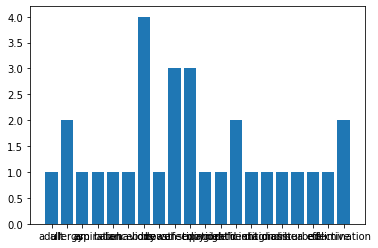

In [18]:
make_wordcount_hist(cleaned_data[0][1])

In [22]:
data[0][1]

In [23]:
data = process_data(load_data(file))

(0, None)

In [26]:
cleaned_data[0][1].split()

['fm',
 'am',
 'page',
 'ii',
 'gordons',
 'functional',
 'health',
 'patterns',
 'through',
 'health',
 'perception',
 'health',
 'management',
 'pattern',
 'health',
 'maintenance',
 'ineffective',
 'therapeutic',
 'regimeneffective',
 'management',
 'therapeutic',
 'regimenineffective',
 'management',
 'therapeutic',
 'regimenreadiness',
 'for',
 'enhanced',
 'management',
 'therapeutic',
 'regimenfamily',
 'ineffective',
 'management',
 'therapeutic',
 'regimencommunity',
 'ineffective',
 'management',
 'noncompliance',
 'specify',
 'health',
 'seeking',
 'behaviors',
 'specify',
 'energy',
 'field',
 'disturbed',
 'falls',
 'risk',
 'for',
 'infection',
 'risk',
 'for',
 'injury',
 'trauma',
 'risk',
 'for',
 'protection',
 'ineffective',
 'poisoning',
 'risk',
 'for',
 'suffocation',
 'risk',
 'for',
 'perioperative',
 'positioning',
 'injury',
 'risk',
 'for',
 'sudden',
 'infant',
 'death',
 'syndrome',
 'nutritional',
 'metabolic',
 'pattern',
 'nutritionmore',
 'than',
 'body

In [42]:
merged_data = ' '.join([i[1] for i in cleaned_data])

' fm     am  page ii gordons functional health patterns through  health perception health management pattern health maintenance ineffective  therapeutic regimeneffective management  therapeutic regimenineffective management  therapeutic regimenreadiness for enhanced management  therapeutic regimenfamily ineffective management  therapeutic regimencommunity ineffective management  noncompliance specify  health seeking behaviors specify  energy field disturbed  falls risk for  infection risk for  injury trauma risk for  protection ineffective  poisoning risk for  suffocation risk for  perioperative positioning injury risk for  sudden infant death syndrome  nutritional metabolic pattern nutritionmore than body requirements imbalanced  nutritionmore than body requirements risk for imbalanced  nutritionless than body requirements imbalanced  nutrition readiness for enhanced  breastfeeding ineffective  breastfeeding effective  breastfeeding interrupted  infant feeding pattern ineffective  asp

# Chapter isolation

In [1]:
data_c = {}
with pdf.open(file) as raw:
    for i in tqdm(range(50)):
        data_c[i] = raw.pages[i]
# raw.close()

NameError: name 'pdf' is not defined

In [55]:
data_c[0].extract_text()

ValueError: seek of closed file

In [4]:
pip install pdfminer

Processing /home/vince/.cache/pip/wheels/1c/28/7d/f390b82bb0307deb63ff27a1474fd308ec68ee028cb9ab6283/pdfminer-20191125-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pdfstructure.printer import JsonFilePrinter

ImportError: cannot import name 'extract_pages' from 'pdfminer.high_level' (/home/vince/.local/lib/python3.8/site-packages/pdfminer/high_level.py)